In [22]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain, config

In [23]:
import numpy as np
import matplotlib.pyplot as plt
D=100
N=2
xdata = np.random.random(D*N).reshape(D,N).astype(np.float32)

In [24]:
def f(x):
    y = x * x
    return y

In [42]:
tdata = (xdata[:, 1] > f(xdata[:,0])).astype(np.int32)

[0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1]


In [26]:
# Call neuronetwoek
C = 2
NN = Chain(l1 = L.Linear(N,C))

In [27]:
def model(x):
    y = NN.l1(x)
    return y

In [28]:
ydata = model(xdata)
print(ydata)

variable([[-1.6086578   0.72529167]
          [-1.9297626   1.008495  ]
          [-1.0785553   0.34114534]
          [-1.1056826   0.721126  ]
          [-0.56116843  0.16336238]
          [-0.905306    0.6373063 ]
          [-0.8883508   0.34960487]
          [-1.8094391   0.95095575]
          [-1.4447563   0.4358289 ]
          [-0.48194432  0.29471022]
          [-1.0759575   0.30319828]
          [-0.8785889   0.33786398]
          [-1.3694545   0.9413978 ]
          [-1.2151698   0.97249   ]
          [-0.9141207   0.64680374]
          [-1.8457417   1.0886574 ]
          [-0.9137009   0.8392595 ]
          [-0.362501    0.35426784]
          [-0.9395421   0.93895143]
          [-1.46587     0.96565306]
          [-1.0126714   0.52979946]
          [-1.1048446   0.8927825 ]
          [-0.6998073   0.17021106]
          [-0.6503708   0.3873392 ]
          [-0.9476786   0.18884706]
          [-0.50018114  0.52528024]
          [-1.6928614   1.0031953 ]
          [-0.8124207   0.25

In [29]:
acc = F.accuracy(ydata, tdata)
print(acc)

variable(0.72)


In [30]:
optNN = Opt.SGD()
optNN.setup(NN)

In [31]:
# Save result
loss_series = []
acc_series = []

In [33]:
T = 5000
for time in range(T):
    config.train = True
    optNN.target.zerograds()
    ydata = model(xdata)
    loss = F.softmax_cross_entropy(ydata, tdata)
    acc = F.accuracy(ydata, tdata)
    loss.backward()
    optNN.update()
    # Stroe the result
    loss_series.append(loss.data)
    acc_series.append(acc.data)
    

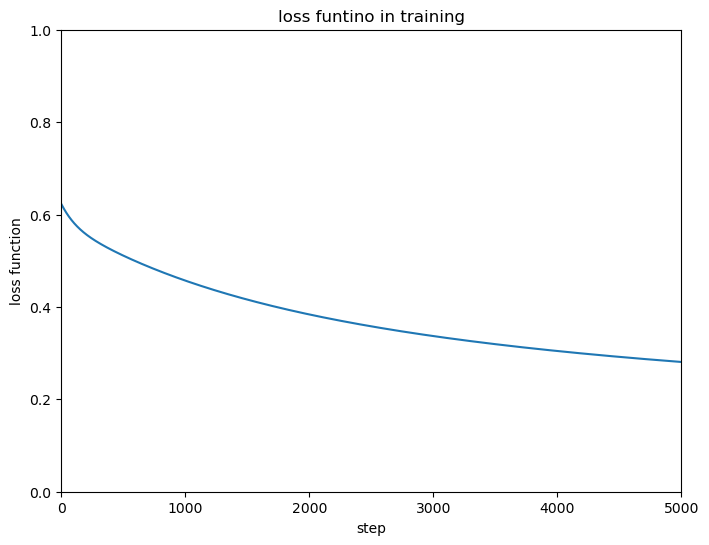

In [34]:
Tall = len(loss_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall), loss_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()

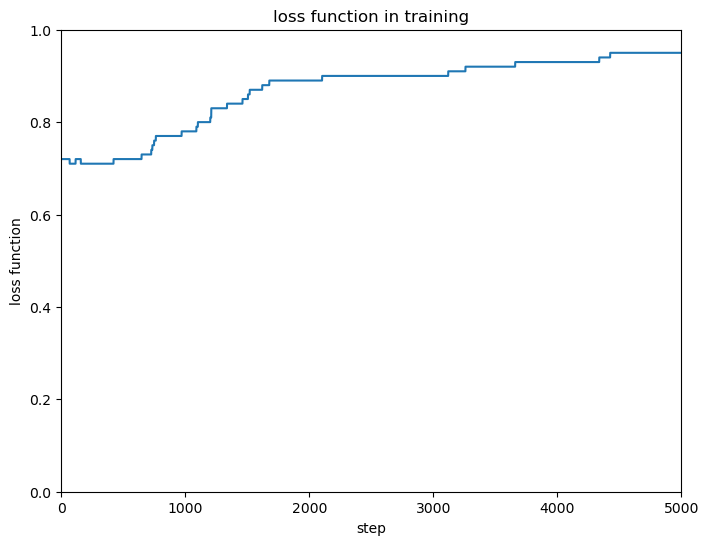

In [35]:
Tall = len(acc_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall), acc_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()

In [36]:
# 2 layers neuronetwork
C = 2
NN = Chain(l1 = L.Linear(N, 4), l2 = L.Linear(4,C))


In [37]:
def model (x):
    h = NN.l1(x)
    h = F.sigmoid(h)
    y = NN.l2(h)
    return y

In [38]:
optNN = Opt.SGD()
optNN.setup(NN)
loss_series = []
acc_series = []

In [39]:
T = 20000
for time in range(T):
    config.train = True
    optNN.target.zerograds()
    ydata = model(xdata)
    loss = F.softmax_cross_entropy(ydata, tdata)
    acc = F.accuracy(ydata, tdata)
    loss.backward()
    optNN.update()
    
    loss_series.append(loss.data)
    acc_series.append(acc.data)

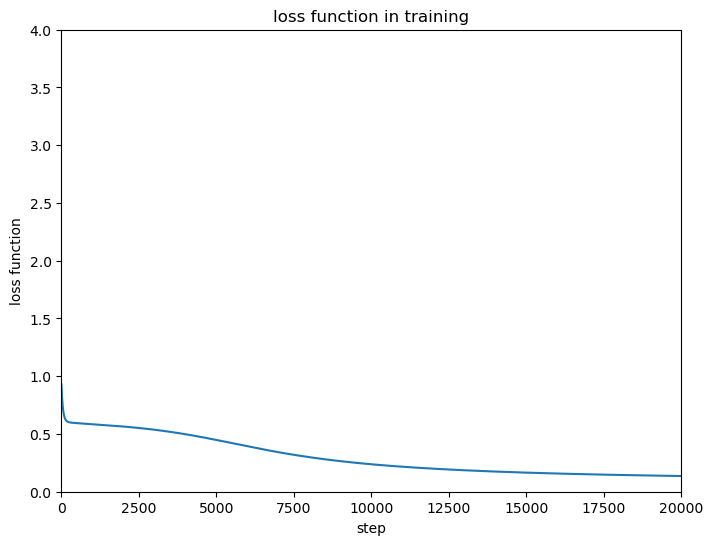

In [40]:
# Show loss function result
Tall = len(loss_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall), loss_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0, Tall])
plt.ylim([0,4])
plt.show()

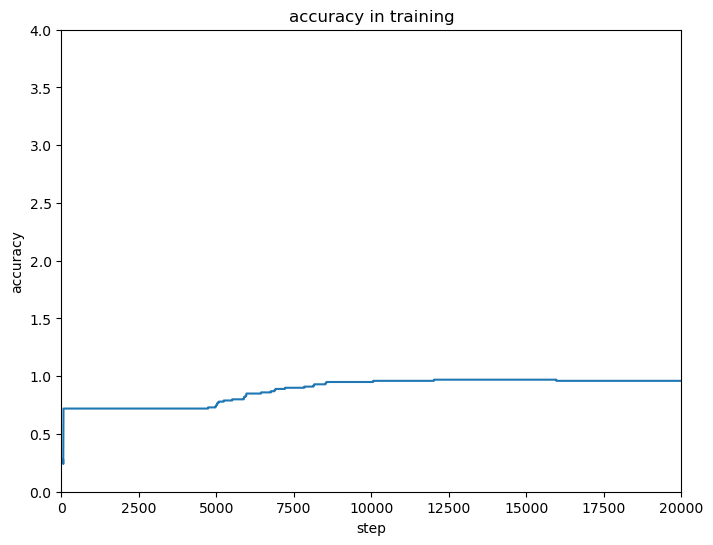

In [41]:
# Show accuracy
Tall = len(acc_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall), acc_series)
plt.title("accuracy in training")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0, Tall])
plt.ylim([0,4])
plt.show()